# 极限中心定理
## 1 方差与z-score标准化

方差公式$V[X]=E\left((X-E(X))^{2}\right)$，也表示为$\sigma^{2}=\frac{\sum(X-\mu)^{2}}{N}$。

方差描述的是分布的离散程度，方差为0时则$X=E(X)$，即分布不含有任何随机的成分。

由于数据加常量后其方差$\sigma^2$不变，乘以$n$后则变为$n^2\sigma^2$，所以对任何分布的数据都可以做一个标准化（z-score），使得方差$\sigma^2=1$，期望$\mu=0$。具体做法为：

$W=\frac{X-\mu}{\sigma}$

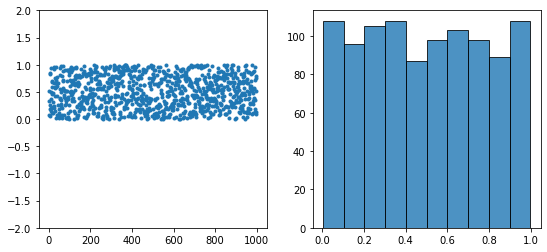

mean: 0.5 std: 0.29


In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.random.rand(1000)

fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(9, 4))

axs1.plot(X, '.')
axs1.set_ylim(-2, 2)

axs2.hist(X, edgecolor='k', alpha=0.8)
plt.show()

print("mean:", np.round(X.mean(), 2), "std:", np.round(X.std(), 2))

进行z-score标准化$z=\frac{x-\mu}{\sigma}$操作（证明过程见下一小节）

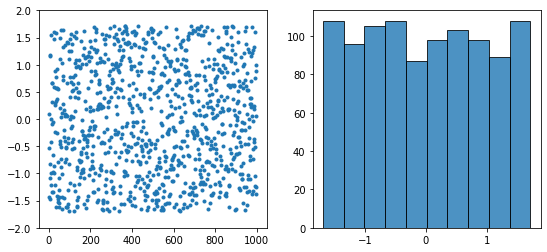

mean: -0.0 std: 1.0


In [2]:
W = (X - X.mean())/X.std()

mean = W.mean()
std_var = W.std()

fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(9, 4))

axs1.plot(W, '.')
axs1.set_ylim(-2, 2)

axs2.hist(W, edgecolor='k', alpha=0.8)
plt.show()

print("mean:", np.round(W.mean(), 2), "std:", np.round(W.std(), 2))

打印的信息显示新的数据均值为0，方差为1，但是histgram显示出每个bin（默认10个）的数据数量没有变化。

### 1.1 z-score证明
假设一组数据$\{X: x_1,x_2...x_n\}$的均值为$\mu=\sum_i^n\frac{x_i}{n}$，方差为$\sigma=\sum_i^n \frac{(x_i-\mu)^2}{n}$，经过z-score标准化的数据$\{Z: z_i=\frac{x_i-\mu}{\sigma}\}$。

$Z$的均值
$$\begin{aligned}E(Z) &= \sum_i^n\frac{\frac{x_i-\mu}{\sigma}}{n}\\
&= \sum_i^n\frac{x_i}{n\sigma} - \frac{\sum_i^n\mu}{n\sigma}\\
&= \frac{\mu}{\sigma} - \frac{\mu}{\sigma}\\
&= 0\end{aligned}$$

$Z$的方差（已经得知$\mu_z=0$）
$$\begin{aligned}V(Z) &= \sum_i^n \frac{\left(\frac{(x_i-\mu)}{\sigma} - \mu_z\right)^2}{n}\\
&= \frac{1}{\sigma^2}\sum_i^n\frac{(x_i-\mu)^2}{n}\\
&= \frac{\sigma^2}{\sigma^2} = 1
\end{aligned}$$

## 2 标准正太分布
对于正太分布$x \sim N\left(\mu, \sigma^{2}\right)$，其概率密度函数如下：

$$f(x)=\frac{1}{\sqrt{2 \pi} \sigma} \exp \left(-\frac{(x-\mu)^{2}}{2 \sigma^{2}}\right)$$

如果$\mu=0, \sigma=1$，则称为标准正太分布$x \sim N\left(\mu, \sigma^{2}\right)$，概率密度函数简化为：

$$f(x)=\frac{1}{\sqrt{2 \pi}} \exp \left(-\frac{x^2}{2}\right)$$

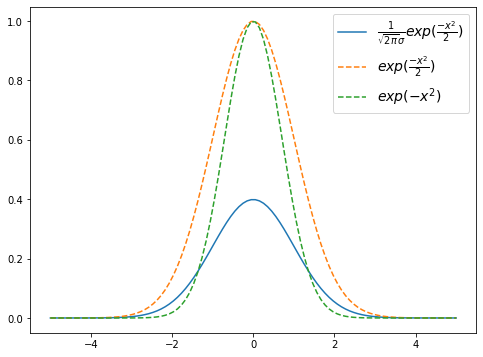

In [3]:
def NormDist(x, mean=0, sigma=1):
    assert(sigma != 0)
    return np.exp(-(x-mean)**2/2)/(np.sqrt(2*np.pi)*sigma)

plt.figure(figsize=(8, 6))

xs = np.linspace(-5, 5, 100)
X = [NormDist(i) for i in xs]
plt.plot(xs, X, '-', label=r'$\frac{1}{\sqrt{2\pi}\sigma}exp(\frac{-x^2}{2})$')

X = [np.exp(-i**2/2) for i in xs]
plt.plot(xs, X, '--', label=r'$exp(\frac{-x^2}{2})$')

X = [np.exp(-i**2) for i in xs]
plt.plot(xs, X, '--', label=r'$exp(-x^2)$')

plt.legend(fontsize=14)
plt.show()

从上图可以看出：1. 由于$-x^2$的存在使得在0点处左右对称，并且$x$越接近于0越大；2. 而$\frac{1}{\sqrt{2\pi}}$和$e$的指数除以$1/2$使得其面积（在x轴上积分）为1，满足了概率密度函数积分为1的性质。

### 2.1 z-score变换为标准正态分布
正态分布$x \sim N\left(\mu, \sigma^{2}\right)$经过z-score标准化后会变成标准正态分布。证明过程如下

正态分布概率密度函数
$$f(x)=\frac{1}{\sqrt{2 \pi} \sigma} \exp \left(-\frac{(x-\mu)^{2}}{2 \sigma^{2}}\right)$$

其精髓和意义就是通过对$f(x)$积分，可以得到$x$在任意区间的概率，例如$x<k$的概率：

$$P(x<k)=\int_{-\infty}^{k} \frac{1}{\sqrt{2 \pi} \sigma} \exp \left(-\frac{(x-\mu)^{2}}{2 \sigma^{2}}\right) \mathrm{d} x$$

经过z-score标准化的新数据为$z=\frac{x-\mu}{\sigma}$，那么$z<k$的概率：

$$P(z < k) = P\left(\frac{x-\mu}{\sigma}<k\right) = P(x < k\sigma + \mu)$$

将$k\sigma + \mu$代入积分公式，替换上限$k$：

$$P(x < k\sigma + \mu) = \int_{-\infty}^{k\sigma + \mu} \frac{1}{\sqrt{2 \pi} \sigma} \exp \left(-\frac{(x-\mu)^{2}}{2 \sigma^{2}}\right) \mathrm{d} x$$


可是我们要求的是$z < k$的概率$P(z < k)$，由于$P(z<k) = P(x<k\sigma + \mu)$，只需要将$x = z\sigma + \mu$只要代入积分公式替换掉$x$即可：

$$\begin{aligned}
P(z<k) &=\int_{-\infty}^{k} \frac{1}{\sqrt{2 \pi} \sigma} \exp \left(-\frac{(z \sigma+\mu-\mu)^{2}}{2 \sigma^{2}}\right) \sigma \mathrm{d} z \\
&=\int_{\infty}^{k} \frac{1}{\sqrt{2 \pi}} \exp \left(-\frac{z^{2}}{2}\right) \mathrm{d} z
\end{aligned}$$
> 
> 注意两点：
> 1. 积分$x$的上限为$x^*=k\sigma + \mu$，新变量$z$的上限为$\frac{x^*-\mu}{\sigma} = \frac{k\sigma + \mu - \mu}{\sigma} = k$
> 2. 对$x=z\sigma + \mu$两边求导，得到$dx=\sigma dz$

至此，证明得到z-score变化后的数据服从标准正太分布$z \sim N(0, 1)$。


## 3 中心极限定理

The central limit theorem in statistics states that, given a sufficiently large sample size, the sampling distribution of the mean for a variable will approximate a normal distribution regardless of that variable’s distribution in the population.


### 3.1 名词解释
在统计学中，有一些专用名词不能弄混淆，特别是我们平时说的“样本”在这里并不是指单个数据，参见[Central Limit Theorem Explained](https://statisticsbyjim.com/basics/central-limit-theorem/)
- 总体（population）：研究对象的整个群体（the complete set of all objects or people of interest）
- 样本（sample）：从总体中选取的一部分数据（a subset of the entire population）
- 样本数量（the number of samples）：有多少个样本。
- 样本大小/样本容量（sample size)：每个样本里包含多少个数据。
- 抽样分布（sampling distribution）：将样本平均值的分布可视化。

### 3.2 定义
对于独立同分布的变量$X_1, X_2, X_3 ... X_n$，其中$E(X_i)=\mu,\ V(X_i)=\sigma^2 < \infty$，这组样本的均值表示为：

$$\bar{X}_{n}:=\frac{X_{1}+\cdots+X_{n}}{n}$$

中心极限定理研究的就是这个$\bar{X_n}$的分布情况，而不是$X$的分布情况，因为现实中很多数据我们是无法获得其总体（population）分布情况的，而中心极限定理可以帮助我们分析其均值位置。

不同的$n$或者不同的样本都会影响$\bar{X_n}$，直觉上$\bar{X_n}$是和$E(X_i)$有关的，而且是围绕着$E(X_i)$的。如果对这组数据做z-score标准化得到$Y_n = (X_i-\mu)/\sigma$，标准化后的样本均值

$$\bar{Y}_n = \frac{\sum_i^n(\frac{X_i - \mu}{\sigma})}{n}
= \sum_i^n{\frac{x_i}{n\sigma}} - \frac{\mu}{\sigma}$$

由大数定律（[大数定律、中心极限定理与格里文科定理](https://zhuanlan.zhihu.com/p/89557100)）可知，当$n\rightarrow+\infty$时，$\{X_i, i=1,2,...,n\}$以概率1收敛于期望$\mu$，因此得到

$$\lim_{n\rightarrow\infty} \bar{Y}_n \rightarrow 0$$

现在给出中心极限定理的定义：

$$\lim _{n \rightarrow+\infty} P\left\{\frac{\bar{X_n}-\mu}{\sigma / \sqrt{n}} \leqslant x\right\}=\frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{x} e^{\frac{-t^{2}}{2}} d t$$

公式左边相当于对$\bar{X}_n$做了类似z-score的处理，减去总体均值$\mu$，并除以$\sigma/\sqrt{n}$，右边就是**标准正态分布$N(0,1)$**的概率密度函数的积分，也就是说当**样本容量极大时，样本均值的抽样分布趋近于期望为$\mu$，标准差为$\frac{\sigma}{\sqrt{n}}$的正态分布**。如果将分子分母同乘以$n$，那么可以得到$X_i$和的表示形式

$$\frac{\sum_{i=1}^{n} X_{i}-n \mu}{\sigma \sqrt{n}} \sim N(0,1)$$

[证明](https://zhuanlan.zhihu.com/p/93738110)过程将$\bar{X}_{norm}$的[特征函数](https://www.zhihu.com/question/23686709/answer/383239222)在0点泰勒展开，得到了和标准正态分布$N(0, 1)$一样的特征函函数$e^{-\frac{t^2}{2}}$。

### 3.3 单次采样
#### 3.3.1 均匀分布
以均匀分布`np.random.rand()`为例，一次采样1000个值，可以看到样本均值接近0.5，并且histgram（默认10个bin）中每个bin的值都接近`1000/10=100`

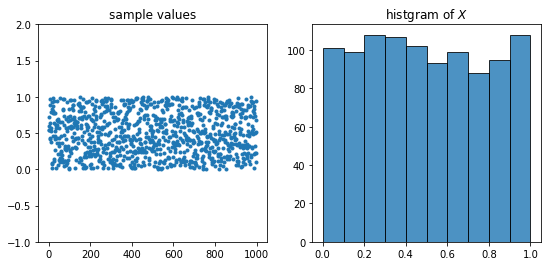

mean: [0.49592153]


In [4]:
sample_size = 1000 # 采样个数
number_of_sample = 1 # 采样次数

np.random.seed(0)
X = np.random.rand(number_of_sample, sample_size)

mean = X.mean(axis=1)

fig, axs = plt.subplots(1, 2, figsize=(9, 4))

# sample values
axs[0].plot(X[0], '.')
axs[0].set_ylim(-1, 2)
axs[0].set_title('sample values')

# histgram of X
axs[1].hist(X[0], edgecolor='k', alpha=0.8)
axs[1].set_title('histgram of $X$')

plt.show()
print('mean:', mean)

#### 3.3.2 偏正态分布
如果用正态分布实验，结果可能不能很好的展示中心极限定理。我们直接用SciPy里的[skewnorm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skewnorm.html)偏正态分布，概率密度函数为`skewnorm.pdf(x, a) = 2 * norm.pdf(x) * norm.cdf(a*x)`。

E(X) = 0.7740617226446519


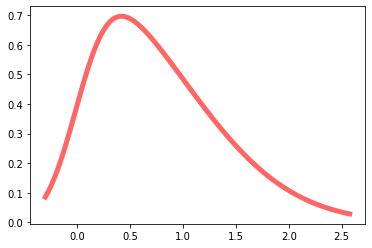

In [5]:
from scipy.stats import skewnorm
import matplotlib.pyplot as plt

a = 4
fig, ax = plt.subplots(1, 1)
mean, var, skew, kurt = skewnorm.stats(a, moments='mvsk')

x = np.linspace(skewnorm.ppf(0.01, a), skewnorm.ppf(0.99, a), 100)
ax.plot(x, skewnorm.pdf(x, a), 'r-', lw=5, alpha=0.6, label='skewnorm pdf')

print('E(X) =', mean)

打印的结果显示这个分布均值约等于0.774，我们采样1000个值看看其分布情况。

mean: 0.7426786528215207


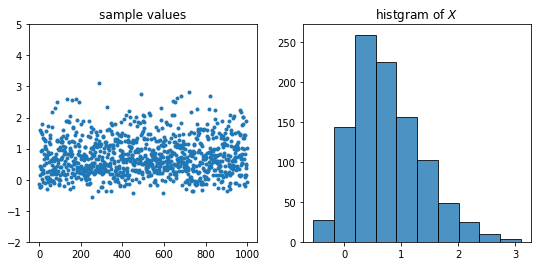

In [6]:
r = skewnorm.rvs(a, size=1000)

fig, axs = plt.subplots(1, 2, figsize=(9, 4))

# sample values
axs[0].plot(r, '.')
axs[0].set_ylim(-2, 5)
axs[0].set_title('sample values')

# histgram of X
axs[1].hist(r, edgecolor='k', alpha=0.8)
axs[1].set_title('histgram of $X$')

print('mean:', r.mean())

### 3.4 多次采样
#### 3.4.1 均匀分布
我们分别测试$n=\{3, 10, 30, 100\}$的情况，每种情况都采集100000次，并画出每种情况下均值的分布图（已归一化）。从图中可以看出，虽然样本容量$n=3$很小，但是其均值的分布图已经是正态分布，这和均匀分布本身对称有关系。当$n=30$时候已经很好了。

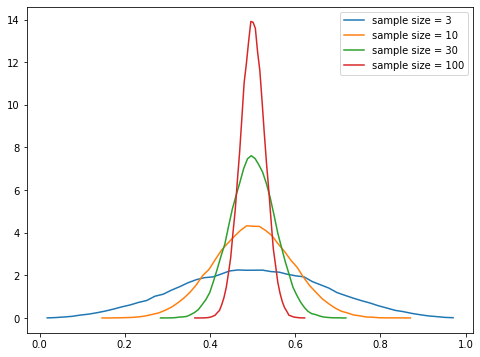

In [7]:
sample_size = [3, 10, 30, 100] # 每次采样个数
number_of_sample = 100000 # 采样次数

plt.figure(figsize=(8,6))

for i, ss in enumerate(sample_size):
    Xs = np.random.rand(number_of_sample, ss)    
    h, b = np.histogram(Xs.mean(axis=1), bins=50, density=True)
    b = (b[:-1] + b[1:]) / 2.
    plt.plot(b, h, '-', label=f'sample size = {ss}')

plt.legend()

#### 3.4.2 偏正态分布
同均匀分布一样，仍然测试$n=\{3, 10, 30, 100\}$的情况，但是注意，由于样本容量$n=3$太小，其均值分布类似于总体数据的偏正态分布，而$n=10$就好了很多。

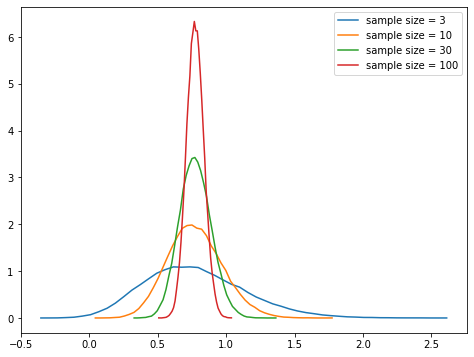

In [8]:
sample_size = [3, 10, 30, 100] # 每次采样个数
number_of_sample = 100000 # 采样次数


plt.figure(figsize=(8,6))

for i, ss in enumerate(sample_size):
    Xs = skewnorm.rvs(4, size=(number_of_sample, ss))
    h, b = np.histogram(Xs.mean(axis=1), bins=50, density=True)
    b = (b[:-1] + b[1:]) / 2.
    plt.plot(b, h, '-', label=f'sample size = {ss}')

plt.legend()

### 3.5 练习题
e.g.1 某炮兵阵地对敌人的防御地段进行100次射击，每次射击中炮弹的命中数是一个随机变量，其期望为2，方差为1.69，求在100次射击中有180颗到220颗炮弹命中目标的概率。

解：设$X_i$表示第$i$次设计命中的炮弹数，则$E(X_i)=2,\ D(X_i)=1.69$，因为100很大，所以根据中心极限定理可以认为$\frac{(S_{100}-100\mu)}{\sqrt{100}\sigma}$近似服从$N(0,1)$，$100\mu=200\ \sigma=1.3$，所以

$$P\left(180 \leq S_{n} \leq 220\right) = P\left(\frac{180-200}{13} \leq \frac{S_{n}-200}{13} \leq \frac{220-200}{13}\right)\\
\approx \varnothing\left(\frac{20}{13}\right)-\varnothing\left(-\frac{20}{13}\right)\\
= 2\varnothing(1.54) - 1 = 0.8764$$